In [33]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import pandas as pd 
import numpy as np
import plotly.express as px
%matplotlib inline

In [34]:
netflix=pd.read_csv("./Datasets/netflix_titles.csv")
print('the size of netflix data is {}'.format(netflix.shape))
netflix.head()

the size of netflix data is (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [35]:
disney=pd.read_csv("./Datasets/disney_plus_titles.csv")
print('the size of disney data is {}'.format(disney.shape))
disney.head()

the size of disney data is (1450, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [36]:
netflix['platform'] = 'netflix'
disney['platform']  = 'disney'

In [37]:
df_all = pd.concat([netflix, disney])

In [38]:
# data cleaning
df_all['duration'] = np.where(df_all['rating']=='74 min','74 min', df_all['duration'] )
df_all['duration'] = np.where(df_all['rating']=='84 min','84 min', df_all['duration'] )
df_all['duration'] = np.where(df_all['rating']=='66 min','66 min', df_all['duration'] )

df_all['rating'] = np.where(df_all['rating']=='74 min', 'Nan', df_all['rating'])
df_all['rating'] = np.where(df_all['rating']=='84 min', 'Nan', df_all['rating'])
df_all['rating'] = np.where(df_all['rating']=='66 min', 'Nan', df_all['rating'])

In [39]:
country_codes = {'afghanistan': 'AFG',
 'albania': 'ALB',
 'algeria': 'DZA',
 'american samoa': 'ASM',
 'andorra': 'AND',
 'angola': 'AGO',
 'anguilla': 'AIA',
 'antigua and barbuda': 'ATG',
 'argentina': 'ARG',
 'armenia': 'ARM',
 'aruba': 'ABW',
 'australia': 'AUS',
 'austria': 'AUT',
 'azerbaijan': 'AZE',
 'bahamas': 'BHM',
 'bahrain': 'BHR',
 'bangladesh': 'BGD',
 'barbados': 'BRB',
 'belarus': 'BLR',
 'belgium': 'BEL',
 'belize': 'BLZ',
 'benin': 'BEN',
 'bermuda': 'BMU',
 'bhutan': 'BTN',
 'bolivia': 'BOL',
 'bosnia and herzegovina': 'BIH',
 'botswana': 'BWA',
 'brazil': 'BRA',
 'british virgin islands': 'VGB',
 'brunei': 'BRN',
 'bulgaria': 'BGR',
 'burkina faso': 'BFA',
 'burma': 'MMR',
 'burundi': 'BDI',
 'cabo verde': 'CPV',
 'cambodia': 'KHM',
 'cameroon': 'CMR',
 'canada': 'CAN',
 'cayman islands': 'CYM',
 'central african republic': 'CAF',
 'chad': 'TCD',
 'chile': 'CHL',
 'china': 'CHN',
 'colombia': 'COL',
 'comoros': 'COM',
 'congo democratic': 'COD',
 'Congo republic': 'COG',
 'cook islands': 'COK',
 'costa rica': 'CRI',
 "cote d'ivoire": 'CIV',
 'croatia': 'HRV',
 'cuba': 'CUB',
 'curacao': 'CUW',
 'cyprus': 'CYP',
 'czech republic': 'CZE',
 'denmark': 'DNK',
 'djibouti': 'DJI',
 'dominica': 'DMA',
 'dominican republic': 'DOM',
 'ecuador': 'ECU',
 'egypt': 'EGY',
 'el salvador': 'SLV',
 'equatorial guinea': 'GNQ',
 'eritrea': 'ERI',
 'estonia': 'EST',
 'ethiopia': 'ETH',
 'falkland islands': 'FLK',
 'faroe islands': 'FRO',
 'fiji': 'FJI',
 'finland': 'FIN',
 'france': 'FRA',
 'french polynesia': 'PYF',
 'gabon': 'GAB',
 'gambia, the': 'GMB',
 'georgia': 'GEO',
 'germany': 'DEU',
 'ghana': 'GHA',
 'gibraltar': 'GIB',
 'greece': 'GRC',
 'greenland': 'GRL',
 'grenada': 'GRD',
 'guam': 'GUM',
 'guatemala': 'GTM',
 'guernsey': 'GGY',
 'guinea-bissau': 'GNB',
 'guinea': 'GIN',
 'guyana': 'GUY',
 'haiti': 'HTI',
 'honduras': 'HND',
 'hong kong': 'HKG',
 'hungary': 'HUN',
 'iceland': 'ISL',
 'india': 'IND',
 'indonesia': 'IDN',
 'iran': 'IRN',
 'iraq': 'IRQ',
 'ireland': 'IRL',
 'isle of man': 'IMN',
 'israel': 'ISR',
 'italy': 'ITA',
 'jamaica': 'JAM',
 'japan': 'JPN',
 'jersey': 'JEY',
 'jordan': 'JOR',
 'kazakhstan': 'KAZ',
 'kenya': 'KEN',
 'kiribati': 'KIR',
 'north korea': 'PRK',
 'south korea': 'KOR',
 'kosovo': 'KSV',
 'kuwait': 'KWT',
 'kyrgyzstan': 'KGZ',
 'laos': 'LAO',
 'latvia': 'LVA',
 'lebanon': 'LBN',
 'lesotho': 'LSO',
 'liberia': 'LBR',
 'libya': 'LBY',
 'liechtenstein': 'LIE',
 'lithuania': 'LTU',
 'luxembourg': 'LUX',
 'macau': 'MAC',
 'macedonia': 'MKD',
 'madagascar': 'MDG',
 'malawi': 'MWI',
 'malaysia': 'MYS',
 'maldives': 'MDV',
 'mali': 'MLI',
 'malta': 'MLT',
 'marshall islands': 'MHL',
 'mauritania': 'MRT',
 'mauritius': 'MUS',
 'mexico': 'MEX',
 'micronesia': 'FSM',
 'moldova': 'MDA',
 'monaco': 'MCO',
 'mongolia': 'MNG',
 'montenegro': 'MNE',
 'morocco': 'MAR',
 'mozambique': 'MOZ',
 'namibia': 'NAM',
 'nepal': 'NPL',
 'netherlands': 'NLD',
 'new caledonia': 'NCL',
 'new zealand': 'NZL',
 'nicaragua': 'NIC',
 'nigeria': 'NGA',
 'niger': 'NER',
 'niue': 'NIU',
 'northern mariana islands': 'MNP',
 'norway': 'NOR',
 'oman': 'OMN',
 'pakistan': 'PAK',
 'palau': 'PLW',
 'panama': 'PAN',
 'papua new guinea': 'PNG',
 'paraguay': 'PRY',
 'peru': 'PER',
 'philippines': 'PHL',
 'poland': 'POL',
 'portugal': 'PRT',
 'puerto rico': 'PRI',
 'qatar': 'QAT',
 'romania': 'ROU',
 'russia': 'RUS',
 'rwanda': 'RWA',
 'saint kitts and nevis': 'KNA',
 'saint lucia': 'LCA',
 'saint martin': 'MAF',
 'saint pierre and miquelon': 'SPM',
 'saint vincent and the grenadines': 'VCT',
 'samoa': 'WSM',
 'san marino': 'SMR',
 'sao tome and principe': 'STP',
 'saudi arabia': 'SAU',
 'senegal': 'SEN',
 'serbia': 'SRB',
 'seychelles': 'SYC',
 'sierra leone': 'SLE',
 'singapore': 'SGP',
 'sint maarten': 'SXM',
 'slovakia': 'SVK',
 'slovenia': 'SVN',
 'solomon islands': 'SLB',
 'somalia': 'SOM',
 'south africa': 'ZAF',
 'south sudan': 'SSD',
 'spain': 'ESP',
 'sri lanka': 'LKA',
 'sudan': 'SDN',
 'suriname': 'SUR',
 'swaziland': 'SWZ',
 'sweden': 'SWE',
 'switzerland': 'CHE',
 'syria': 'SYR',
 'taiwan': 'TWN',
 'tajikistan': 'TJK',
 'tanzania': 'TZA',
 'thailand': 'THA',
 'timor-leste': 'TLS',
 'togo': 'TGO',
 'tonga': 'TON',
 'trinidad and tobago': 'TTO',
 'tunisia': 'TUN',
 'turkey': 'TUR',
 'turkmenistan': 'TKM',
 'tuvalu': 'TUV',
 'uganda': 'UGA',
 'ukraine': 'UKR',
 'united arab emirates': 'ARE',
 'united kingdom': 'GBR',
 'united states': 'USA',
 'uruguay': 'URY',
 'uzbekistan': 'UZB',
 'vanuatu': 'VUT',
 'venezuela': 'VEN',
 'vietnam': 'VNM',
 'virgin islands': 'VGB',
 'west bank': 'WBG',
 'yemen': 'YEM',
 'zambia': 'ZMB',
 'zimbabwe': 'ZWE'}

In [40]:
from plotly import io as pio
import plotly.graph_objs as go
from collections import Counter

# Configura o renderizador para 'browser' ou 'vscode'
pio.renderers.default = 'browser'  # Alternativa: 'vscode'

# Define os dados para o gráfico
colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
              "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
              "#08519c", "#0b4083", "#08306b"]

def geoplot(ddf):
    country_with_code, country = {}, {}
    shows_countries = ", ".join(ddf['country'].dropna()).split(", ")
    for c, v in dict(Counter(shows_countries)).items():
        code = ""
        if c.lower() in country_codes:
            code = country_codes[c.lower()]
        country_with_code[code] = v
        country[c] = v

    data = [dict(
        type='choropleth',
        locations=list(country_with_code.keys()),
        z=list(country_with_code.values()),
        colorscale=[[0, "rgb(5, 10, 172)"], [0.65, "rgb(40, 60, 190)"], [0.75, "rgb(70, 100, 245)"],
                    [0.80, "rgb(90, 120, 245)"], [0.9, "rgb(106, 137, 247)"], [1, "rgb(220, 220, 220)"]],
        autocolorscale=False,
        reversescale=True,
        marker=dict(
            line=dict(
                color='gray',
                width=0.5
            )),
        colorbar=dict(
            dtick=1,
            title=''),
    )]

    layout = dict(
        title='',
        geo=dict(
            showframe=False,
            showcoastlines=False,
            projection=dict(
                type='mercator'  # Use letras minúsculas para o tipo de projeção
            )
        )
    )

    fig = dict(data=data, layout=layout)
    pio.show(fig)  # Substitui iplot por pio.show
    return country

# Executa o geoplot e processa os dados
country_vals = geoplot(df_all)
tabs = Counter(country_vals).most_common(25)

labels = [_[0] for _ in tabs][::-1]
values = [_[1] for _ in tabs][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="", marker=dict(color="#008B8B"))

data = [trace1]
layout = go.Layout(title="The number of content by country", height=600, legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)

# Mostra o gráfico de barras
pio.show(fig)

In [41]:
fig2 = px.pie(df_all, names='platform',
              height=400, width=600,
              hole=0.7,
              title='Platform Overview',
              color_discrete_sequence=['#4c78a8', '#72b7b2'])

# Update trace settings
fig2.update_traces(hovertemplate=None, textposition='outside', textinfo='percent+label', rotation=0)

# Update layout settings
fig2.update_layout(margin=dict(t=100, b=30, l=0, r=0), showlegend=False,
                   plot_bgcolor='#fafafa', paper_bgcolor='#fafafa',
                   title_font=dict(size=20, color='#555', family="Lato, sans-serif"),
                   font=dict(size=17, color='#8a8d93'),
                   hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))

fig2.show()

In [42]:
df_group_yr = df_all.groupby(['platform','release_year']).count()['show_id'].reset_index()

In [43]:
fig = px.bar(df_group_yr, x='release_year', y='show_id', color='platform', template='simple_white',
             color_discrete_map={'netflix': '#E50914', 'disney': '#0047AB'})

fig.update_layout(
    title={'text': 'Number of Contents by Released Year',
           'y': 0.95,
           'x': 0.5,
           'xanchor': 'center',
           'yanchor': 'top'},
    xaxis_title='Year',
    yaxis_title='Number of Contents',
    legend_title='Platform Type'
)

fig.update_layout(margin=dict(t=100, b=30, l=0, r=0), showlegend=True,
                  plot_bgcolor='#fafafa', paper_bgcolor='#fafafa',
                  title_font=dict(size=20, color='#555', family='Lato, sans-serif'),
                  font=dict(size=12, color='#8a8d93'),
                  hoverlabel=dict(bgcolor='#444', font_size=8, font_family='Lato, sans-serif'))

fig.show()

In [44]:
df_all.iloc[10000:10100]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,platform
1193,s1194,Movie,Sister Act,Emile Ardolino,"Whoopi Goldberg, Maggie Smith, Harvey Keitel, ...",United States,"November 12, 2019",1992,PG,101 min,"Comedy, Crime, Family",A low-rent lounge singer is forced to hide out...,disney
1194,s1195,Movie,Sister Act 2: Back in the Habit,Bill Duke,"Whoopi Goldberg, Kathy Najimy, Barnard Hughes,...",United States,"November 12, 2019",1993,PG,108 min,"Comedy, Family, Music",Deloris goes back undercover to try to save a ...,disney
1195,s1196,Movie,Skyrunners,Ralph Hemecker,"Kelly Blatz, Joey Pollari, Conrad Coates, Jacq...",United States,"November 12, 2019",2009,TV-PG,93 min,"Action-Adventure, Science Fiction",Teen brothers discover a UFO near their town…a...,disney
1196,s1197,Movie,Sleeping Beauty,Clyde Geronimi,"Mary Costa, Eleanor Audley, Barbara Luddy, Tay...",United States,"November 12, 2019",1959,G,77 min,"Animation, Family, Fantasy",A fairy-tale classic about a princess saved by...,disney
1197,s1198,Movie,Smart House,LeVar Burton,"Ryan Merriman, Kevin Kilner, Jessica Steen, Ka...",United States,"November 12, 2019",1999,TV-G,82 min,"Comedy, Coming of Age, Drama",A computerized Smart House becomes an overly p...,disney
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,s1289,TV Show,The Imagineering Story,NaN,NaN,United States,"November 12, 2019",2019,TV-PG,1 Season,"Docuseries, Historical",Creating happiness takes a strong blend of ima...,disney
1289,s1290,Movie,The Incredible Journey,Fletcher Markle,"Émile Genest, John Drainie, Tommy Tweed, Sandr...","Canada, United States","November 12, 2019",1963,G,80 min,"Action-Adventure, Animals & Nature, Family",Two dogs and a cat traverse the Canadian front...,disney
1290,s1291,Movie,The Incredibles,Brad Bird,"Craig Nelson, Holly Hunter, Samuel Jackson, Ja...",United States,"November 12, 2019",2004,PG,116 min,"Action-Adventure, Animation, Family","A family of Supers, forced to adopt civilian l...",disney
1291,s1292,Movie,The Journey of Natty Gann,Jeremy Kagan,"Meredith Salenger, John Cusack, Ray Wise, Lain...",United States,"November 12, 2019",1985,PG,101 min,"Action-Adventure, Coming of Age, Drama",A brave young girl embarks on a cross-country ...,disney


In [45]:
df_all['listed_in']

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
1445            Action-Adventure, Family, Science Fiction
1446                     Action-Adventure, Comedy, Family
1447                          Biographical, Comedy, Drama
1448                         Buddy, Comedy, Coming of Age
1449        Action-Adventure, Animals & Nature, Animation
Name: listed_in, Length: 10257, dtype: object

In [46]:
# Copia o DataFrame original
genre_count = df_all.copy()

# Cria um novo DataFrame com os gêneros
genres = genre_count['listed_in'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
genres.name = 'genre'

In [47]:
# Junta o DataFrame de gêneros com o original
genre_count = genre_count.drop(columns=['listed_in']).join(genres)

# Verifica os primeiros registros
genre_count.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,platform,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",netflix,Documentaries
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",netflix,Animation
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",netflix,Family
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,Join Mickey and the gang as they duck the halls!,disney,Documentaries
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,Join Mickey and the gang as they duck the halls!,disney,Animation


In [48]:
genre_count.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,platform,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",netflix,Documentaries
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",netflix,Animation
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",netflix,Family
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,Join Mickey and the gang as they duck the halls!,disney,Documentaries
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,Join Mickey and the gang as they duck the halls!,disney,Animation


In [49]:
# Plota o histograma
fig = px.histogram(data_frame=genre_count, x='genre', title="Genre of the Movies")
fig.update_layout(
    plot_bgcolor='#fafafa', paper_bgcolor='#fafafa',
    title_font=dict(size=20, color='#555', family='Lato, sans-serif'),
    font=dict(size=12, color='#8a8d93'),
    hoverlabel=dict(bgcolor='#444', font_size=8, font_family='Lato, sans-serif')
)
fig.update_xaxes(tickangle=-45, tickfont=dict(size=10))

fig.show()

In [50]:
df_group_genre = df_all.groupby(['platform','listed_in']).count()['show_id'].reset_index()

In [51]:
df_group_genre[df_group_genre['platform']=='netflix'].sort_values('show_id', ascending=False)[:10].style.background_gradient()

,platform,listed_in,show_id
655,netflix,"Dramas, International Movies",362
603,netflix,Documentaries,359
799,netflix,Stand-Up Comedy,334
529,netflix,"Comedies, Dramas, International Movies",274
648,netflix,"Dramas, Independent Movies, International Movies",252
751,netflix,Kids' TV,220
450,netflix,Children & Family Movies,215
454,netflix,"Children & Family Movies, Comedies",201
610,netflix,"Documentaries, International Movies",186
658,netflix,"Dramas, International Movies, Romantic Movies",180


In [52]:
top10_netflix = df_group_genre[df_group_genre['platform']=='netflix'].sort_values('show_id', ascending=False)[:10]['listed_in'].values.tolist()

In [53]:
fig2 = px.pie(df_all[(df_all['platform']=='netflix')&(df_all['listed_in'].isin(top10_netflix))], names='listed_in', 
             height=600, width=900, 
             hole=0.7, 
             title='Top 10 genre on Netflix',
                   color_discrete_sequence=['#4c78a8', '#72b7b2'])
fig2.update_traces(hovertemplate=None, textposition='outside', textinfo='percent+label', rotation=0)
fig2.update_layout(margin=dict(t=100, b=30, l=0, r=0), showlegend=False,
                        plot_bgcolor='#fafafa', paper_bgcolor='#fafafa',
                        title_font=dict(size=20, color='#555', family="Lato, sans-serif"),
                        font=dict(size=9, color='#8a8d93'),
                        hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))
fig2.show()

In [54]:
df_group_genre[df_group_genre['platform']=='disney'].sort_values('show_id', ascending=False)[:10].style.background_gradient()

,platform,listed_in,show_id
116,disney,"Animation, Comedy, Family",124
10,disney,"Action-Adventure, Animation, Comedy",77
14,disney,"Action-Adventure, Animation, Kids",45
83,disney,"Animals & Nature, Documentary, Family",40
12,disney,"Action-Adventure, Animation, Family",40
87,disney,"Animals & Nature, Docuseries, Family",39
82,disney,"Animals & Nature, Documentary",35
130,disney,"Animation, Family, Fantasy",31
24,disney,"Action-Adventure, Comedy, Family",28
129,disney,"Animation, Family",26


In [55]:
top10_disney = df_group_genre[df_group_genre['platform']=='disney'].sort_values('show_id', ascending=False)[:10]['listed_in'].values.tolist()

In [56]:
fig2 = px.pie(df_all[(df_all['platform']=='disney')&(df_all['listed_in'].isin(top10_disney))], names='listed_in', 
             height=600, width=900, 
             hole=0.7, 
             title='Top 10 genre on Disney+',
                   color_discrete_sequence=['#4c78a8', '#72b7b2'])
fig2.update_traces(hovertemplate=None, textposition='outside', textinfo='percent+label', rotation=0)
fig2.update_layout(margin=dict(t=100, b=30, l=0, r=0), showlegend=False,
                        plot_bgcolor='#fafafa', paper_bgcolor='#fafafa',
                        title_font=dict(size=20, color='#555', family="Lato, sans-serif"),
                        font=dict(size=9, color='#8a8d93'),
                        hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))
fig2.show()

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

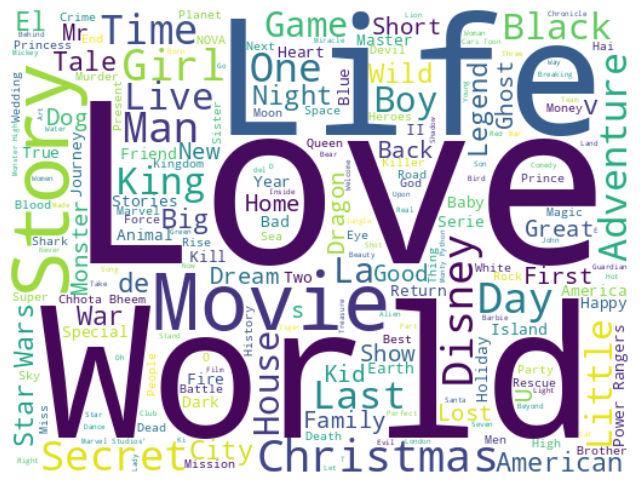

In [58]:
# all data
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
    background_color='white',
    width=512,
    height=384
).generate(" ".join(df_all['title']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('graph.png')

plt.show()


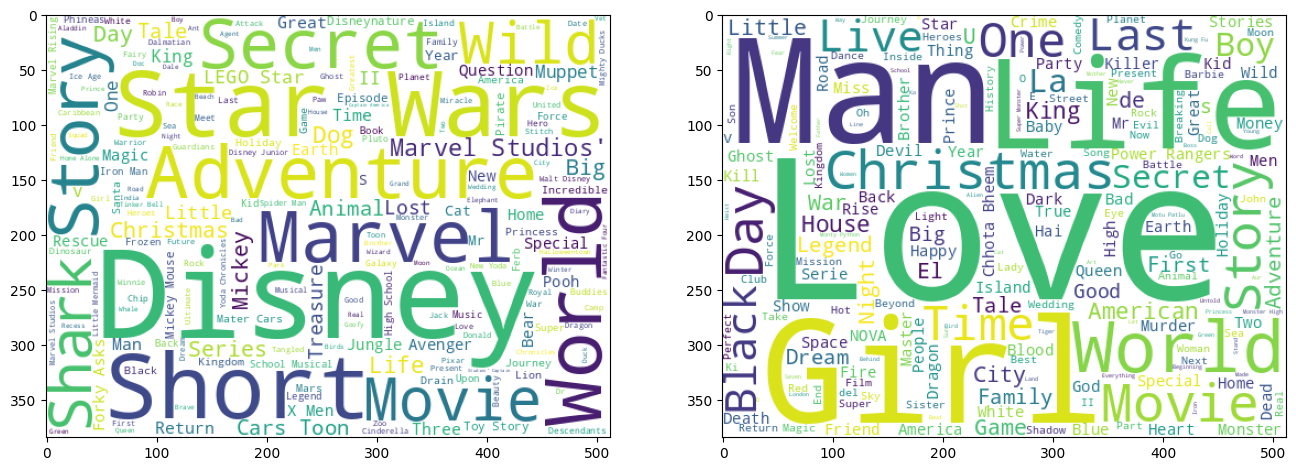

In [59]:
# see Disney+ and netflix respectively.
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
wordcloud1 = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(df_all[df_all['platform']=='disney']['title']))

ax1.imshow(wordcloud1)
wordcloud2 = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(df_all[df_all['platform']=='netflix']['title']))

ax2.imshow(wordcloud2)
plt.show()